In [30]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [31]:
# Assuming 'data' is your DataFrame and 'target_column' is the name of your target column
data = pd.read_csv('../data/01-modified-data/combined_data_clean02.csv')

print(data.head())
# Separate the features (X) and the target (y)
y = data['DX']
X = data.drop('DX', axis=1)


# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Now, X_pca contains the transformed features, and y is your original target variable
#principal_components = pca.fit_transform(scaled_data)
principal_components = X_pca 
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3','PC4'])

# Optionally, if you have a target variable or categorical features not included in PCA
# principal_df['target'] = data['target_column_name']

# Display the final dataset after PCA
print(principal_df.head())
principal_df['DX'] = y



   Site  ADHD Index  Inattentive  Hyper/Impulsive  IQ Measure  Verbal IQ   DX
0   2.0        35.0     9.948444         8.638132    0.100365      106.0  2.0
1   2.0        43.0     9.948444         8.638132    0.100365      119.0  0.0
2   2.0        54.0     9.948444         8.638132    0.100365      116.0  2.0
3   2.0        35.0     9.948444         8.638132    0.100365      127.0  0.0
4   2.0        50.0     9.948444         8.638132    0.100365       95.0  1.0
        PC1       PC2       PC3       PC4
0 -1.526932 -0.075691  2.121639 -0.119316
1 -1.909297  0.361647  1.993155 -0.345064
2 -1.968267  0.623517  2.030651  0.075515
3 -1.996508  0.265812  1.906194 -0.854676
4 -1.452855  0.169047  2.243652  0.696138


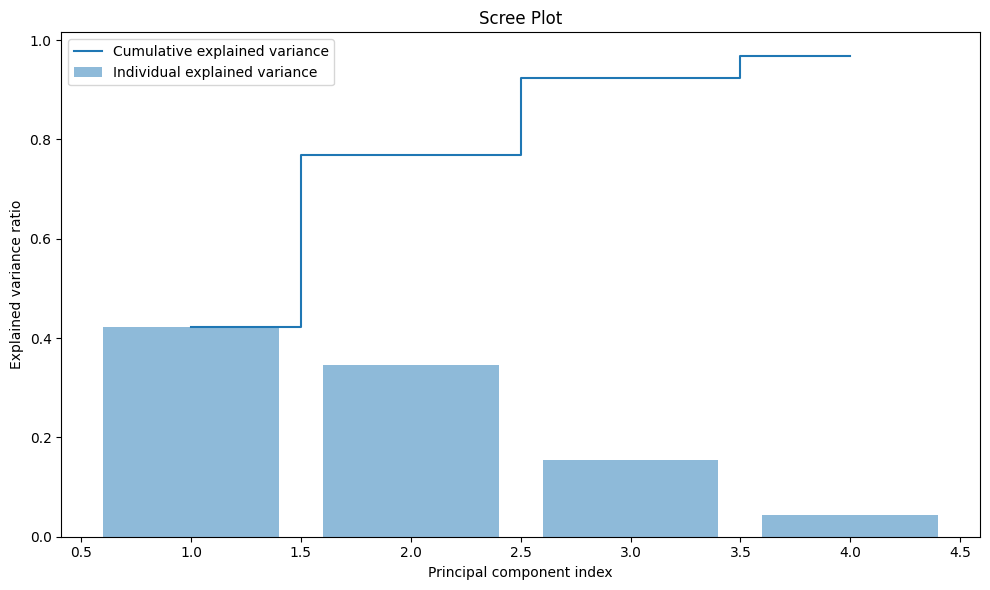

In [32]:
explained_variance = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Creating a scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

From the plot below the 4th principal component i.e PC4 is capturing the least variance of data i.e only about 15% of it 
so we can aoid using that principal component

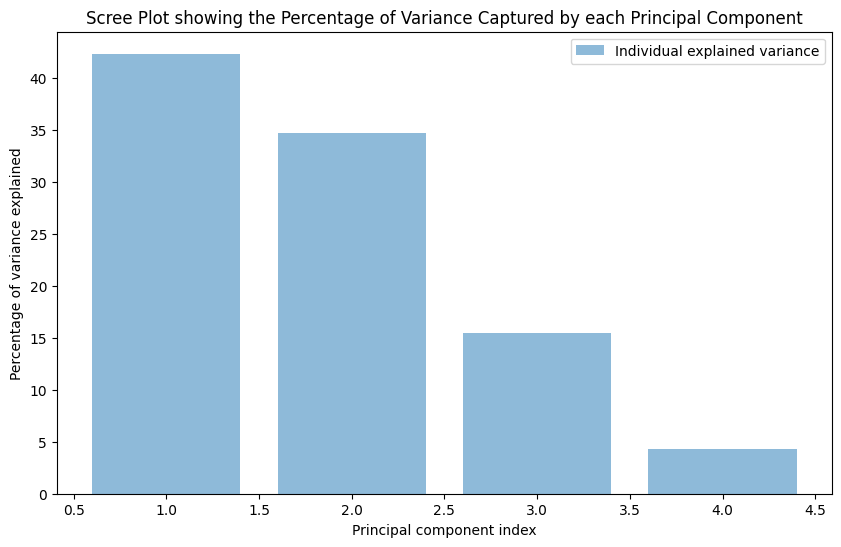

In [33]:
# Get the percentage of variance explained by each of the selected components
#Determine the optimal number of principal components to retain. using the Scree plot
variance_explained = pca.explained_variance_ratio_ * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variance_explained) + 1), variance_explained, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Percentage of variance explained')
plt.xlabel('Principal component index')
plt.title('Scree Plot showing the Percentage of Variance Captured by each Principal Component')
plt.legend(loc='best')
plt.show()

In [34]:
principal_df = principal_df.drop('PC3',axis=1)

In [35]:
principal_df = principal_df.drop('PC4', axis=1)

In [36]:
principal_df.head()

,PC1,PC2,DX
0,-1.526932,-0.075691,2.0
1,-1.909297,0.361647,0.0
2,-1.968267,0.623517,2.0
3,-1.996508,0.265812,0.0
4,-1.452855,0.169047,1.0


In [37]:
# If you want to save this dataset to a new CSV file
principal_df.to_csv('../data/01-modified-data/combined_data_pca.csv', index=False)

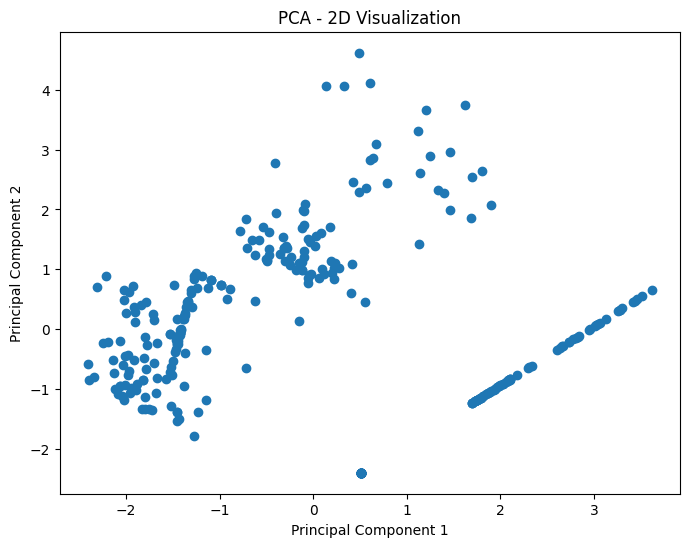

In [38]:
#Visualize the reduced-dimensional data using PCA.

import matplotlib.pyplot as plt

# Assuming principal_df contains at least two principal components named 'PC1' and 'PC2'
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Visualization')
plt.show()


In [39]:
# Implementation of t-SNE on record data
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)



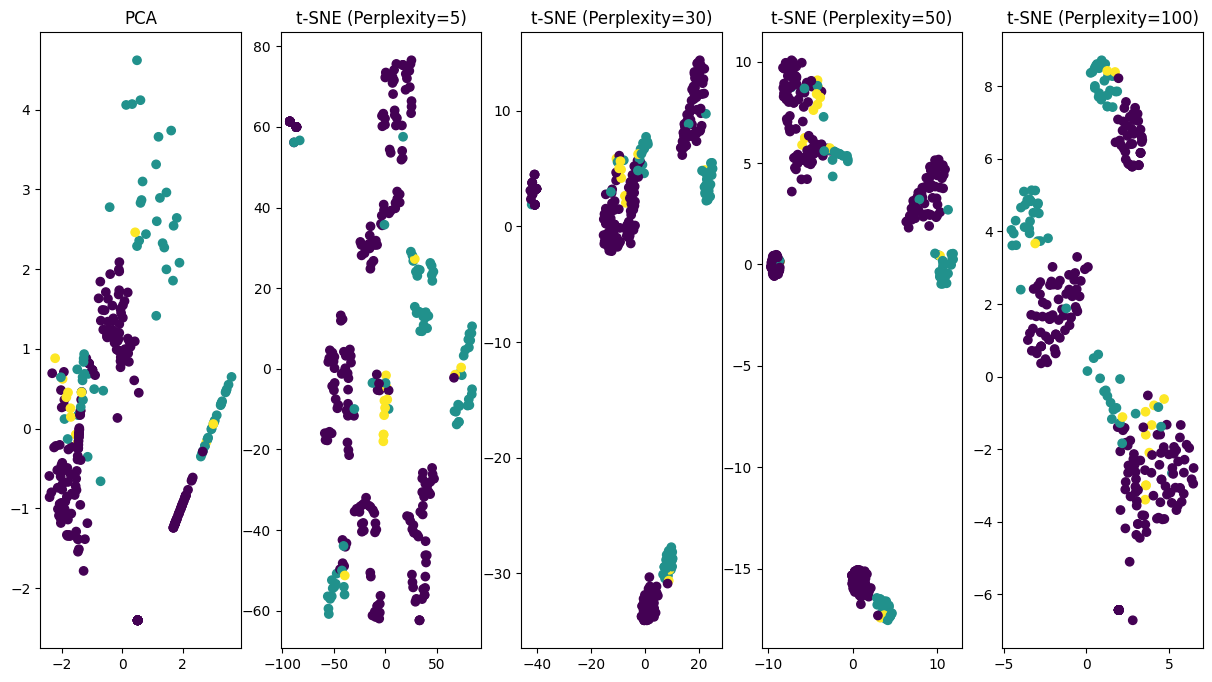

In [40]:
# t-SNE with different perplexity values
perplexities = [5, 30, 50, 100]
tsne_results = []

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    X_tsne = tsne.fit_transform(X)
    tsne_results.append((perplexity, X_tsne))

# Plotting
fig, axes = plt.subplots(1, len(perplexities) + 1, figsize=(15, 8))

# PCA plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axes[0].set_title('PCA')

# t-SNE plots
#Exploring different perplexity values
for i, (perplexity, X_tsne) in enumerate(tsne_results):
    axes[i + 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
    axes[i + 1].set_title(f't-SNE (Perplexity={perplexity})')

plt.show()

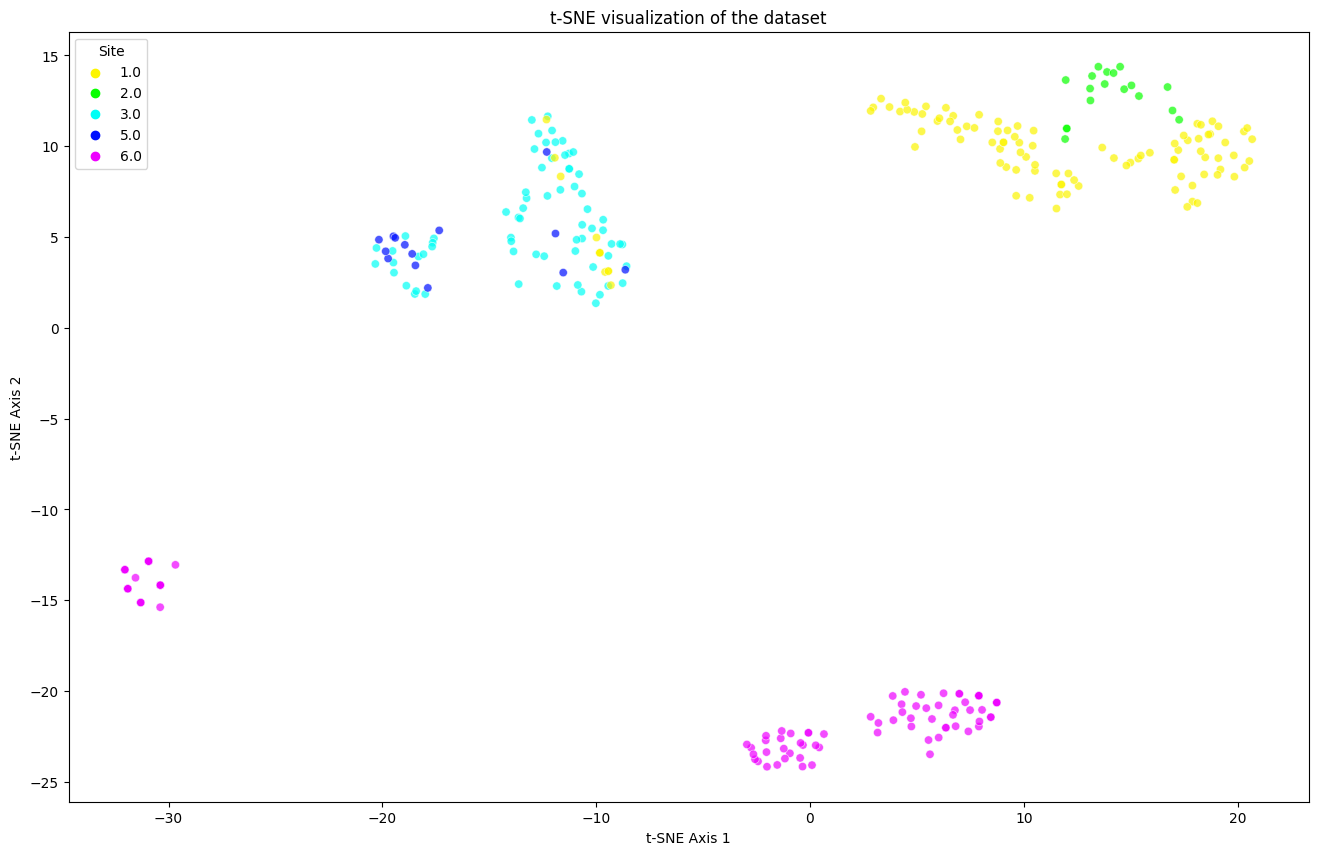

In [41]:
#Visualize the t-SNE output to reveal patterns and clusters.
# Select the features for t-SNE (adjust these columns based on your dataset)
df = X
features = df[['Site', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive', 'IQ Measure', 'Verbal IQ']]

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, n_iter=500)
tsne_results = tsne.fit_transform(features)

# Add the results to the original dataframe
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

# Plotting the t-SNE results
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Site",  # Use a categorical column for coloring (adjust as needed)
    palette=sns.color_palette("hsv", len(df['Site'].unique())),
    data=df,
    legend="full",
    alpha=0.7
)

plt.title('t-SNE visualization of the dataset')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.show()

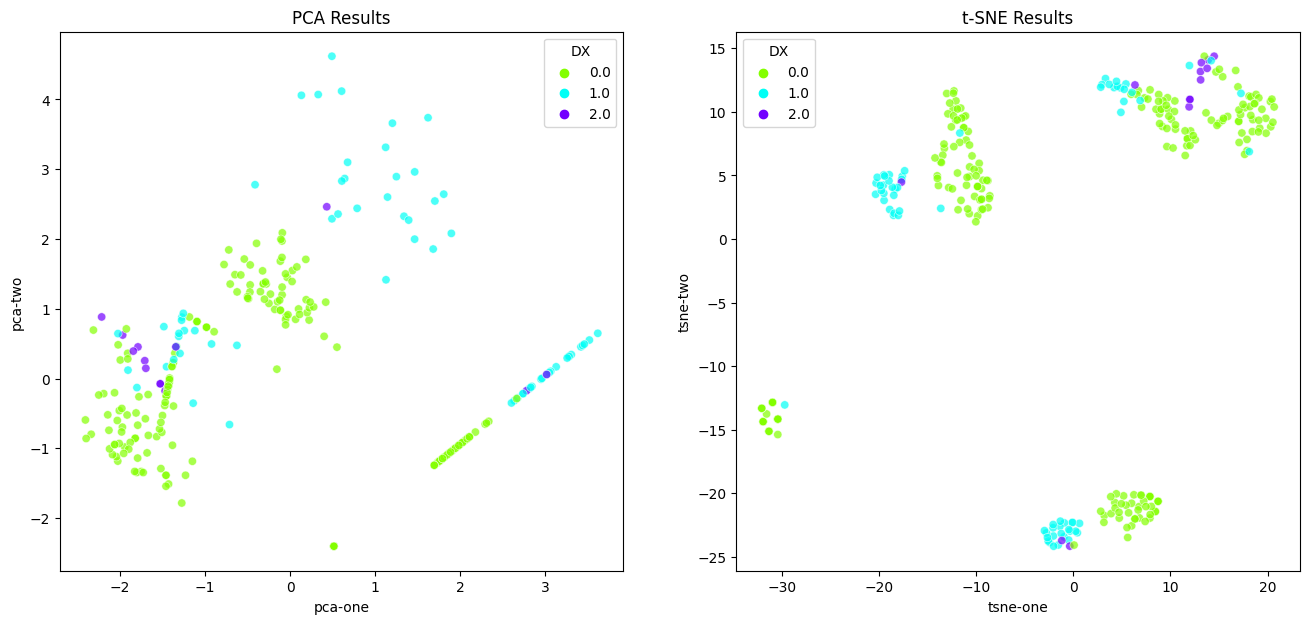

In [42]:
#Comparing t-SNE results with PCA results.
pca_results = X_pca
df['pca-one'] = pca_results[:,0]
df['pca-two'] = pca_results[:,1]
df['tsne-one'] = tsne_results[:,0]
df['tsne-two'] = tsne_results[:,1]
df['DX'] = y
# Plotting the PCA results
plt.figure(figsize=(16,7))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="DX",  # Adjust this categorical variable as needed
    palette=sns.color_palette("hsv", len(df['DX'].unique())),
    data=df,
    legend="brief",
    alpha=0.7
)
plt.title('PCA Results')

# Plotting the t-SNE results
plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="DX",  # Adjust this categorical variable as needed
    palette=sns.color_palette("hsv", len(df['DX'].unique())),
    data=df,
    legend="brief",
    alpha=0.7
)
plt.title('t-SNE Results')

plt.show()